In [1]:
import numpy as np
import pandas as pd
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models

In [2]:
print(raw_df.head())

          0      1      2    3      4      5     6       7    8      9     10
0    0.00632  18.00   2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3
1  396.90000   4.98  24.00  NaN    NaN    NaN   NaN     NaN  NaN    NaN   NaN
2    0.02731   0.00   7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8
3  396.90000   9.14  21.60  NaN    NaN    NaN   NaN     NaN  NaN    NaN   NaN
4    0.02729   0.00   7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8


In [3]:
# Process the data to get features and target
raw_data = raw_df.values
X = np.array(raw_data[::2, :])  # Every second row for the features (even index)
y = np.array(raw_data[1::2, 2])  # Every second row for the target (odd index)

# Create a DataFrame for the features
df = pd.DataFrame(X)

# Add the target variable (PRICE) as a new column in the DataFrame
df['PRICE'] = y

# Display the first few rows of the DataFrame
print(df.head())


         0     1     2    3      4      5     6       7    8      9    10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

   PRICE  
0   24.0  
1   21.6  
2   34.7  
3   33.4  
4   36.2  


In [4]:
# Features (X) and Target (y)
X = df.drop('PRICE', axis=1)
y = df['PRICE']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)
# Standardize the data (important for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
     

In [5]:
# Create a Sequential model
model = models.Sequential()
# Input layer and hidden layers
model.add(layers.Dense(64, input_dim=X_train.shape[1], activation='relu')) #First hidden layer
model.add(layers.Dense(32, activation='relu')) # Second hidden layer
# Output layer (single neuron for predicting the house price)
model.add(layers.Dense(1))
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

C:\python 3.10\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 596.8807 - val_loss: 531.2658
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 581.3307 - val_loss: 502.8830
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 532.8144 - val_loss: 468.2425
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 499.8322 - val_loss: 422.4446
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 438.7989 - val_loss: 363.6358
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 390.1995 - val_loss: 294.1591
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 329.7283 - val_loss: 219.2243
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 237.8865 - val_loss: 149.5221
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 169.6856 - val_loss: 96.1755
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 127.6128 - val_loss: 61.8206
Epoch 11/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 79.0950 - val_loss: 46.0885
Epoch 12/100
11/11 ━━━

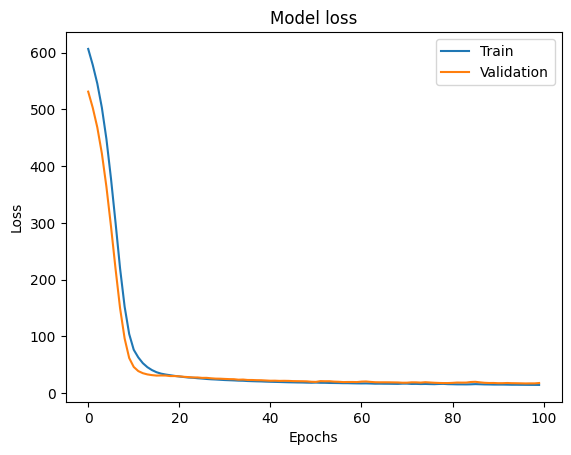

In [8]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32,validation_split=0.2)
import matplotlib.pyplot as plt
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [9]:
# Evaluate the model on the test set
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 12.4548
Test Loss: 19.020933151245117


In [10]:
# Make predictions
predictions = model.predict(X_test)
# Show the first 5 predictions and actual prices
for i in range(5):
  print(f"Predicted: {predictions[i]}, Actual: {y_test.iloc[i]}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted: [28.525969], Actual: 23.6
Predicted: [31.151815], Actual: 32.4
Predicted: [19.19947], Actual: 13.6
Predicted: [26.699118], Actual: 22.8
Predicted: [15.619153], Actual: 16.1


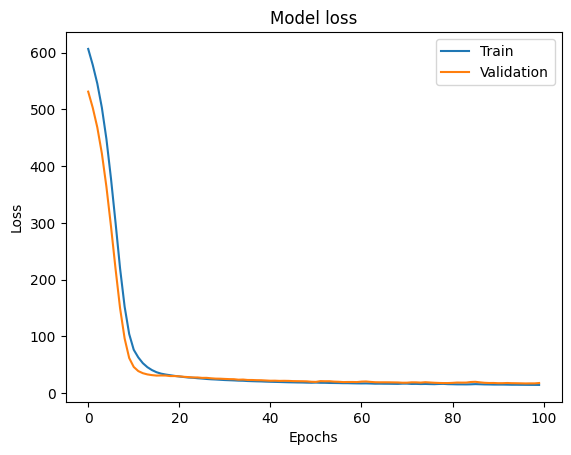

In [11]:
import matplotlib.pyplot as plt
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()